# 文字とスペースをランダムにおいたときのn-gram

In [1]:
using Base.Iterators
ngram(s, n) = collect(zip((drop(s, k) for k = 0:n-1)...))

ngram (generic function with 1 method)

## bi-gramの作成

In [2]:
using Random
random_chars = rand(MersenneTwister(0), "abcdefghijklmnopqrstuvwxyzaeiou   ", 100000)
text = join(random_chars, "")
words = split(text)
pairs = ngram(words, 2)

8039-element Vector{Tuple{SubString{String}, SubString{String}}}:
 ("panxecabl", "dupeoypapbl")
 ("dupeoypapbl", "bndqtgfayasa")
 ("bndqtgfayasa", "icmar")
 ("icmar", "hy")
 ("hy", "pivrwmxqiz")
 ("pivrwmxqiz", "cpefc")
 ("cpefc", "ybpgslyfzfgj")
 ("ybpgslyfzfgj", "rgukubzuxejmfr")
 ("rgukubzuxejmfr", "gcoautyyznmi")
 ("gcoautyyznmi", "eokzalugpxbbezv")
 ("eokzalugpxbbezv", "muxaiogatsvv")
 ("muxaiogatsvv", "gwyq")
 ("gwyq", "srx")
 ⋮
 ("pi", "two")
 ("two", "muyv")
 ("muyv", "tnpcweo")
 ("tnpcweo", "heh")
 ("heh", "vhdhiyvdqvrzkunbz")
 ("vhdhiyvdqvrzkunbz", "vewzwc")
 ("vewzwc", "aaa")
 ("aaa", "gzyudzokuandgcs")
 ("gzyudzokuandgcs", "v")
 ("v", "vbhj")
 ("vbhj", "bauwi")
 ("bauwi", "uqxguo")

## bi-gramの頻度分析

In [3]:
using StatsBase
bigram_counter = StatsBase.countmap(pairs)
sorted_bigram_counter = sort(collect(bigram_counter), by=x->x[2], rev=true)

8035-element Vector{Pair{Tuple{SubString{String}, SubString{String}}, Int64}}:
                                                          ("s", "i") => 2
                                                          ("g", "n") => 2
                                                          ("d", "n") => 2
                                                          ("k", "o") => 2
                                                     ("u", "lggpde") => 1
                                                     ("zyt", "dbgr") => 1
                                ("seaaaqtaykhtfcqztoygl", "lucxjex") => 1
                                                 ("oqb", "yxmmvihg") => 1
                          ("qkuaoujimtteiai", "xuafrekftdxodeshdeo") => 1
                   ("kudayuwl", "jmatmsjeotqhykilqerjaoewqkonzeicv") => 1
                                                     ("fw", "rsumq") => 1
 ("latojpsqreohqzbsxiesbhmtphglwepovteoycefdenau", "dtshsredxjuyig") => 1
            ("n", "omselmilmueinl

┌ Warning: No strict ticks found
└ @ PlotUtils /opt/julia/packages/PlotUtils/n4I4Q/src/ticks.jl:295
┌ Warning: No strict ticks found
└ @ PlotUtils /opt/julia/packages/PlotUtils/n4I4Q/src/ticks.jl:295


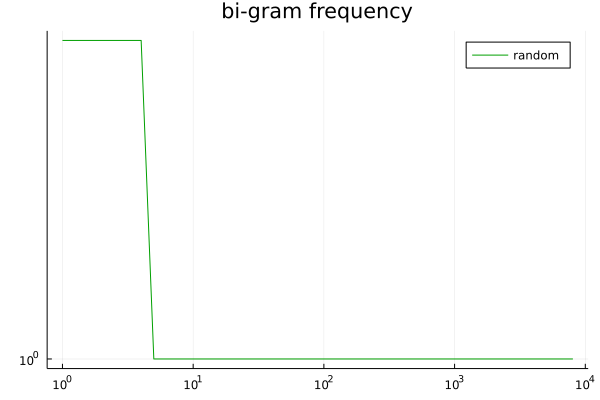

In [4]:
using Plots
plot(map(x -> x[2], sorted_bigram_counter), xaxis=:log, yaxis=:log, title="bi-gram frequency", label="random", color=RGB(0 / 255, 159 / 255, 0 / 255))